Explorar:

Tendências, volatilidade e sazonalidade;

Correlação entre volume e preço;

Diferentes períodos (diário, semanal, intradiário);

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:

data = pd.read_csv('../data/dataprocessed/AAPL_data.csv')

<Figure size 1000x600 with 0 Axes>

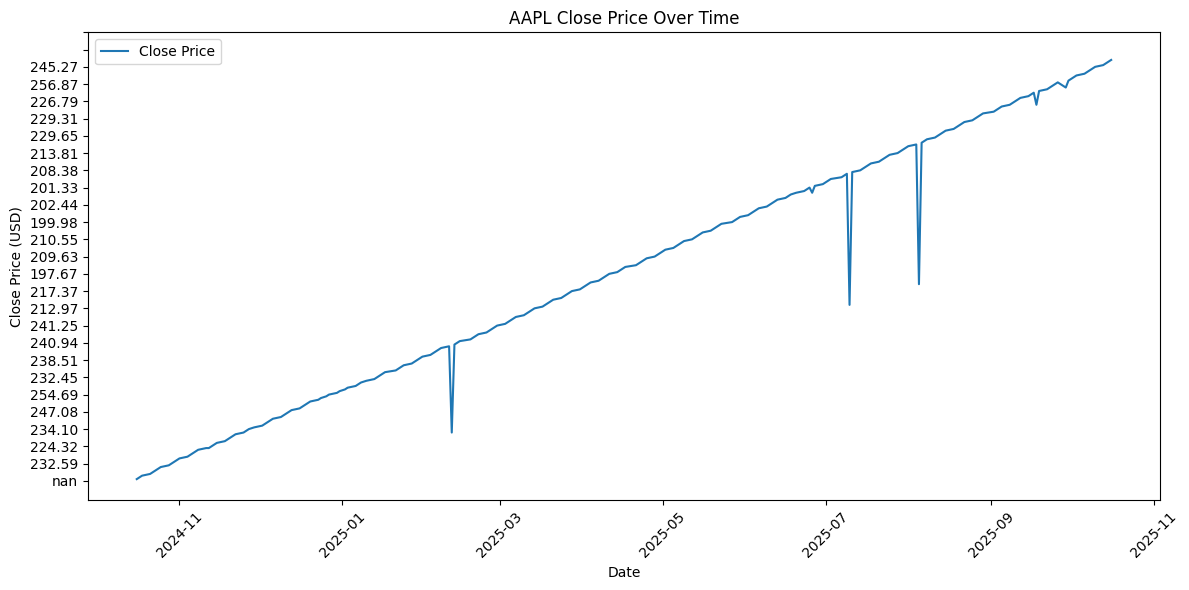

In [5]:

plt.figure(figsize=(10,6))
# Certifique-se de que a coluna 'Date' é datetime
data['Date'] = pd.to_datetime(data['Date'])
data['close'] = pd.to_numeric(data['close'], errors='coerce') 
#data['close'] = data['close'].round(3)
data['close'] = data['close'].apply(lambda x: f'{x:.2f}')
# Plot mais limpo e legível
min_close = data['close'].astype(float).min()
max_close = data['close'].astype(float).max()
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['close'], label='Close Price', color='tab:blue')

plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()

# Melhora formatação das datas no eixo X
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max_close+10, 10))
plt.tight_layout()
plt.show()


In [6]:
fig = px.line(data, x='Date', y='close',
              title='AAPL Close Price Over Time',
              labels={'Date': 'Date', 'close': 'Close Price (USD)'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

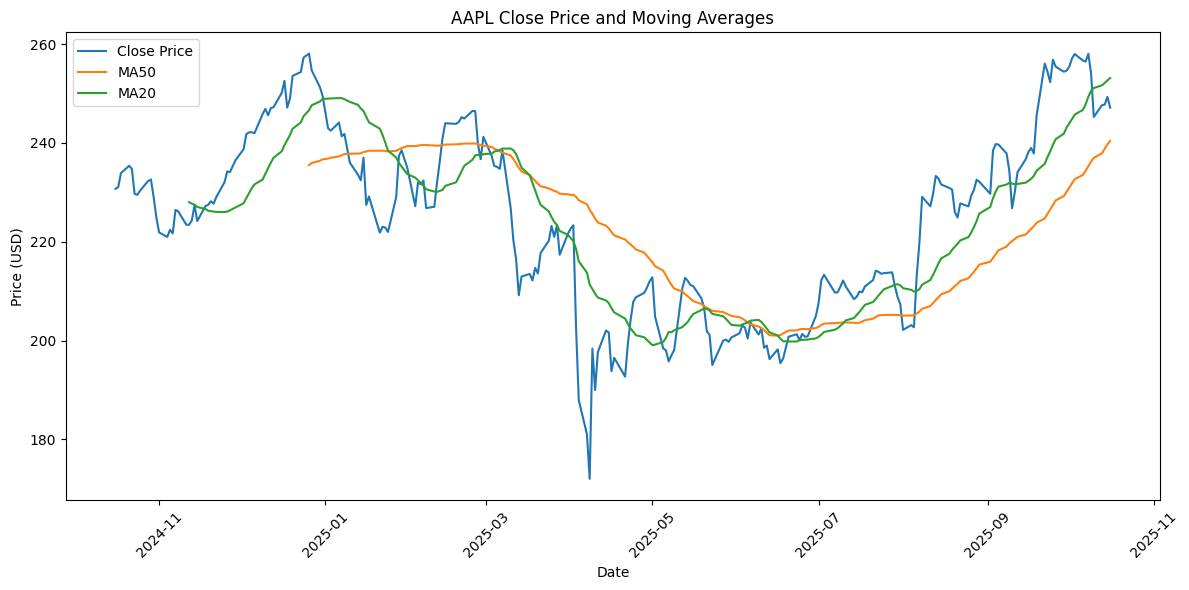

In [7]:
data['MA50'] = data['close'].astype(float).rolling(window=50).mean()
data['MA20'] = data['close'].astype(float).rolling(window=20).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['close'].astype(float), label='Close Price', color='tab:blue')
plt.plot(data['Date'], data['MA50'], label='MA50', color='tab:orange')
plt.plot(data['Date'], data['MA20'], label='MA20', color='tab:green')
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close']
)])
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=True)
fig.show()


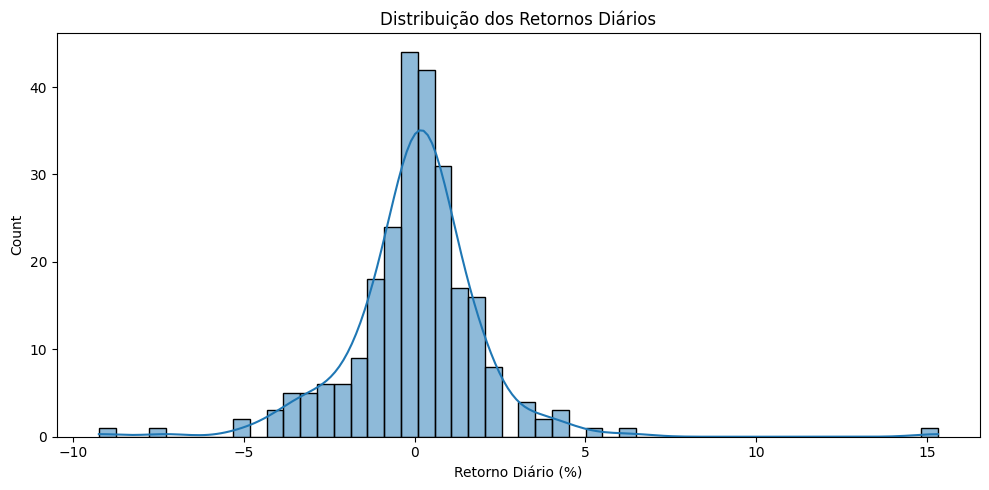

In [9]:
import seaborn as sns
# Garantir que 'close' é numérico antes de calcular retornos (coerce converte valores inválidos para NaN)
data['close'] = pd.to_numeric(data['close'], errors='coerce')
data['Return'] = data['close'].pct_change() * 100  # em porcentagem

plt.figure(figsize=(10,5))
sns.histplot(data['Return'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Retornos Diários')
plt.xlabel('Retorno Diário (%)')
plt.tight_layout()
plt.show()


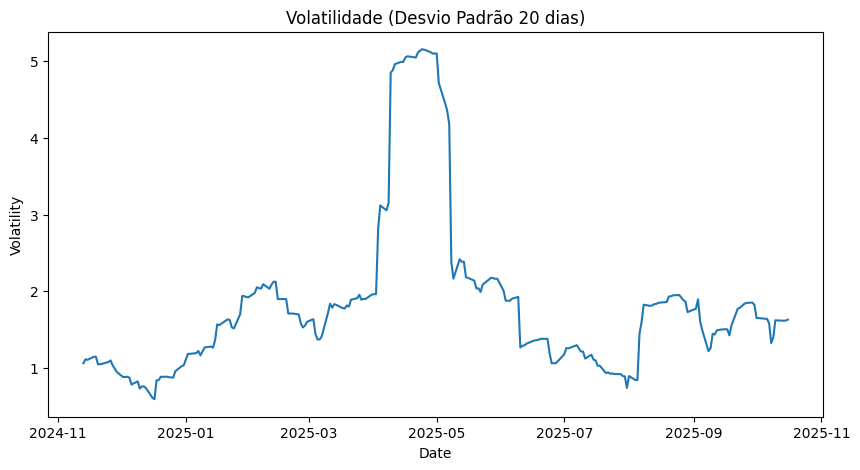

In [10]:
data['Volatility'] = data['Return'].rolling(window=20).std()

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Volatility', data=data)
plt.title('Volatilidade (Desvio Padrão 20 dias)')
plt.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go

# --- Pré-processamento ---
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Médias móveis
data['MA20'] = data['close'].rolling(window=20).mean()
data['MA50'] = data['close'].rolling(window=50).mean()

# Bandas de volatilidade (tipo Bollinger)
data['STD'] = data['close'].rolling(window=20).std()
data['Upper'] = data['MA20'] + 2 * data['STD']
data['Lower'] = data['MA20'] - 2 * data['STD']

# --- Gráfico ---
fig = go.Figure()

# Faixa de volatilidade (banda)
fig.add_traces([
    go.Scatter(
        x=data['Date'], y=data['Upper'], 
        line=dict(color='rgba(173,216,230,0.3)'), name='Upper Band', showlegend=False),
    go.Scatter(
        x=data['Date'], y=data['Lower'],
        fill='tonexty',  # Preenche área entre Upper e Lower
        fillcolor='rgba(173,216,230,0.2)',
        line=dict(color='rgba(173,216,230,0.3)'), name='Lower Band', showlegend=False)
])

# Preço de fechamento
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['close'],
    mode='lines', name='Close Price', line=dict(color='blue')
))

# Médias móveis
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['MA20'],
    mode='lines', name='MA20', line=dict(color='orange', dash='dot')
))
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['MA50'],
    mode='lines', name='MA50', line=dict(color='green', dash='dot')
))

# Layout
fig.update_layout(
    title=' AAPL Stock Price with Trend and Volatility Bands',
    xaxis_title='Date',
    yaxis_title='Close Price (USD)',
    hovermode='x unified',
    xaxis_rangeslider_visible=True,
    template='plotly_white',
    legend=dict(x=0, y=1, traceorder='normal')
)

fig.show()


In [38]:
import pandas as pd
import plotly.graph_objects as go

# Converter e ordenar
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(data['close'].dtype)
# Retornos diários (%)
data['Return'] = data['close'].pct_change()

# Volatilidade móvel (desvio padrão 20 dias)
data['Volatility'] = data['Return'].rolling(window=20).std()

# Gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Volatility'],
    mode='lines', name='Volatility (20-day Std)',
    line=dict(color='firebrick')
))
fig.update_layout(
    title=' Volatility Over Time',
    xaxis_title='Date', yaxis_title='Volatility (Std of Returns)',
    template='plotly_white', hovermode='x unified'
)
fig.show()


float64


C:\Users\hjmar\AppData\Local\Temp\ipykernel_15352\642275419.py:9: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [13]:
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['open'], high=data['high'],
    low=data['low'], close=data['close'],
    name='Candlestick'
)])

# Adiciona a linha da volatilidade
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Volatility']*data['close'].mean() + data['close'].mean(),
    mode='lines', name='Scaled Volatility', line=dict(color='orange', dash='dot')
))

fig.update_layout(
    title=' Candlestick + Volatility Trend',
    xaxis_title='Date', yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False, template='plotly_white'
)
fig.show()


In [14]:
# Mês
data['Month'] = data['Date'].dt.month_name()
monthly_returns = data.groupby('Month')['Return'].mean().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

fig = go.Figure(go.Bar(
    x=monthly_returns.index, y=monthly_returns.values,
    marker_color='lightskyblue'
))
fig.update_layout(
    title=' Average Monthly Returns',
    xaxis_title='Month', yaxis_title='Average Return',
    template='plotly_white'
)
fig.show()


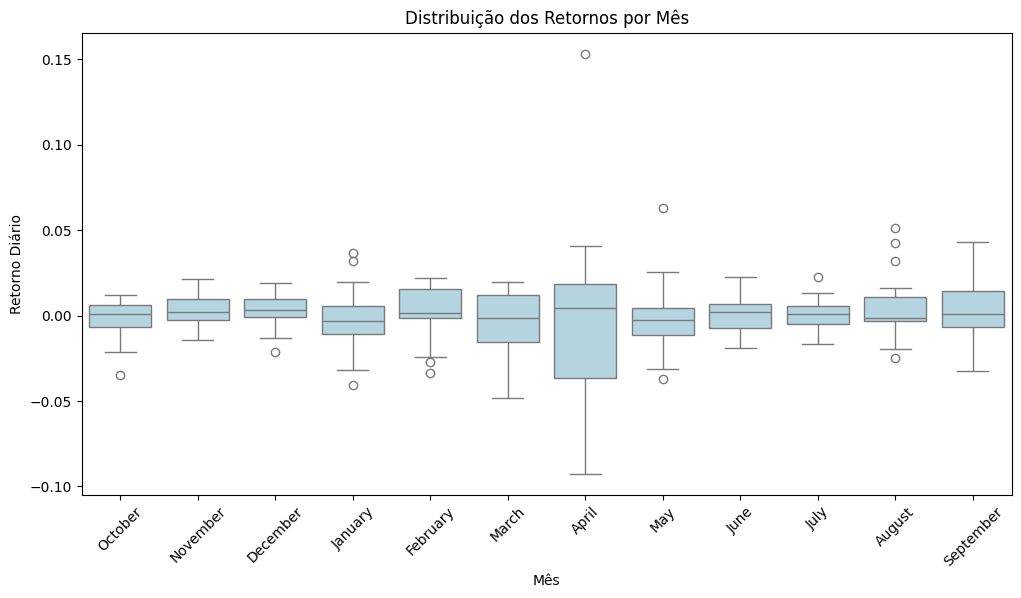

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Date'].dt.month_name(), y=data['Return'], color='lightblue')
plt.title('Distribuição dos Retornos por Mês')
plt.xlabel('Mês')
plt.ylabel('Retorno Diário')
plt.xticks(rotation=45)
plt.show()


In [16]:
data['Weekday'] = data['Date'].dt.day_name()
weekday_returns = data.groupby('Weekday')['Return'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

fig = go.Figure(go.Bar(
    x=weekday_returns.index, y=weekday_returns.values,
    marker_color='mediumturquoise'
))
fig.update_layout(
    title=' Average Return by Day of Week',
    xaxis_title='Day of Week', yaxis_title='Average Return',
    template='plotly_white'
)
fig.show()


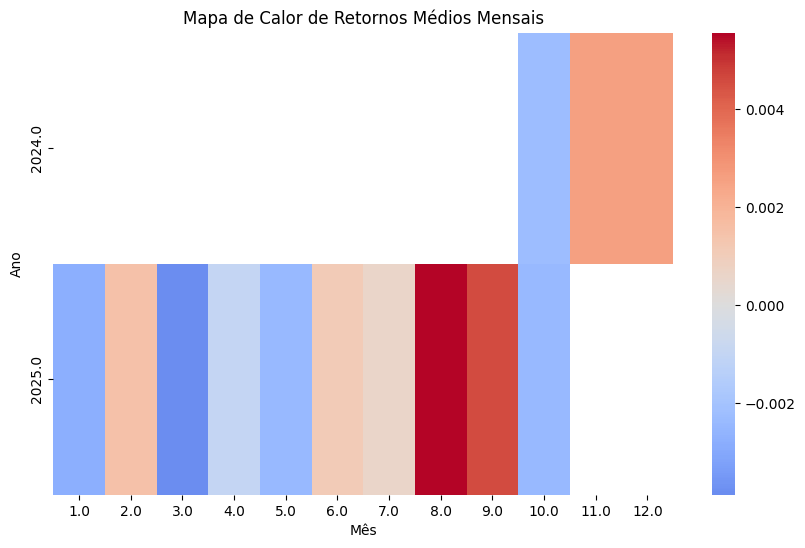

In [17]:
#não necessário
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby(['Year','Month'])['Return'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(monthly_avg, cmap='coolwarm', center=0, annot=False)
plt.title('Mapa de Calor de Retornos Médios Mensais')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()


In [18]:

data['volume'] = pd.to_numeric(data['volume'], errors='coerce')
data['Volatility'] = pd.to_numeric(data['Volatility'], errors='coerce')


data['roll_corr'] = data['volume'].rolling(window=20).corr(data['Volatility'])


fig = px.line(data.dropna(subset=['roll_corr']), x='Date', y='roll_corr',
              title='Correlação Móvel entre Volume e Volatilidade (20 dias)',
              template='plotly_dark')
fig.show()


Eixo Y: Coeficiente de correlação (varia entre -1 e +1)

+1: Relação perfeita positiva (preço sobe → volatilidade sobe)

-1: Relação perfeita negativa (preço sobe → volatilidade cai)

0: Não há relação discernível

Eixo X: Período de tempo

Interpretações Possíveis
Correlação Positiva
Quando os preços e a volatilidade se movem na mesma direção

Exemplo: Mercado em alta com aumento de volatilidade (otimismo excessivo)

Exemplo: Mercado em queda com pico de volatilidade (medo)

Correlação Negativa (mais comum)
Quando preços sobem e volatilidade cai (tendência de baixa volatilidade em bull markets)

Quando preços caem e volatilidade sobe (crises, medo no mercado)

In [29]:
data['retorno_diario'] = data['close'].pct_change()
data['retorno_20dias'] = data['retorno_diario'].rolling(window=20).std()
retorno_anualizado = data['retorno_20dias']*np.sqrt(252)
#print(retorno_anualizado)

vol_anual_media = retorno_anualizado.mean()
print(f'Volatilidade Anualizada Média: {vol_anual_media:.2%}')

vol_anual = retorno_anualizado.iloc[-1]
print(f'Volatilidade Anualizada Atual: {vol_anual:.2%}')


Volatilidade Anualizada Média: 29.06%
Volatilidade Anualizada Atual: 23.36%


C:\Users\hjmar\AppData\Local\Temp\ipykernel_15352\2589778991.py:1: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [30]:
data['mm50'] = data['close'].rolling(window=50).mean()
data['mm20'] = data['close'].rolling(window=20).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['close'], name='Close Price', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['mm50'], name='MA50', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['mm20'], name='MA20', line=dict(color='green')))
fig.update_layout(title='AAPL Close Price with Moving Averages',template='plotly_white')
fig.show()

In [ ]:
fig = px.plot(data, x=Da)

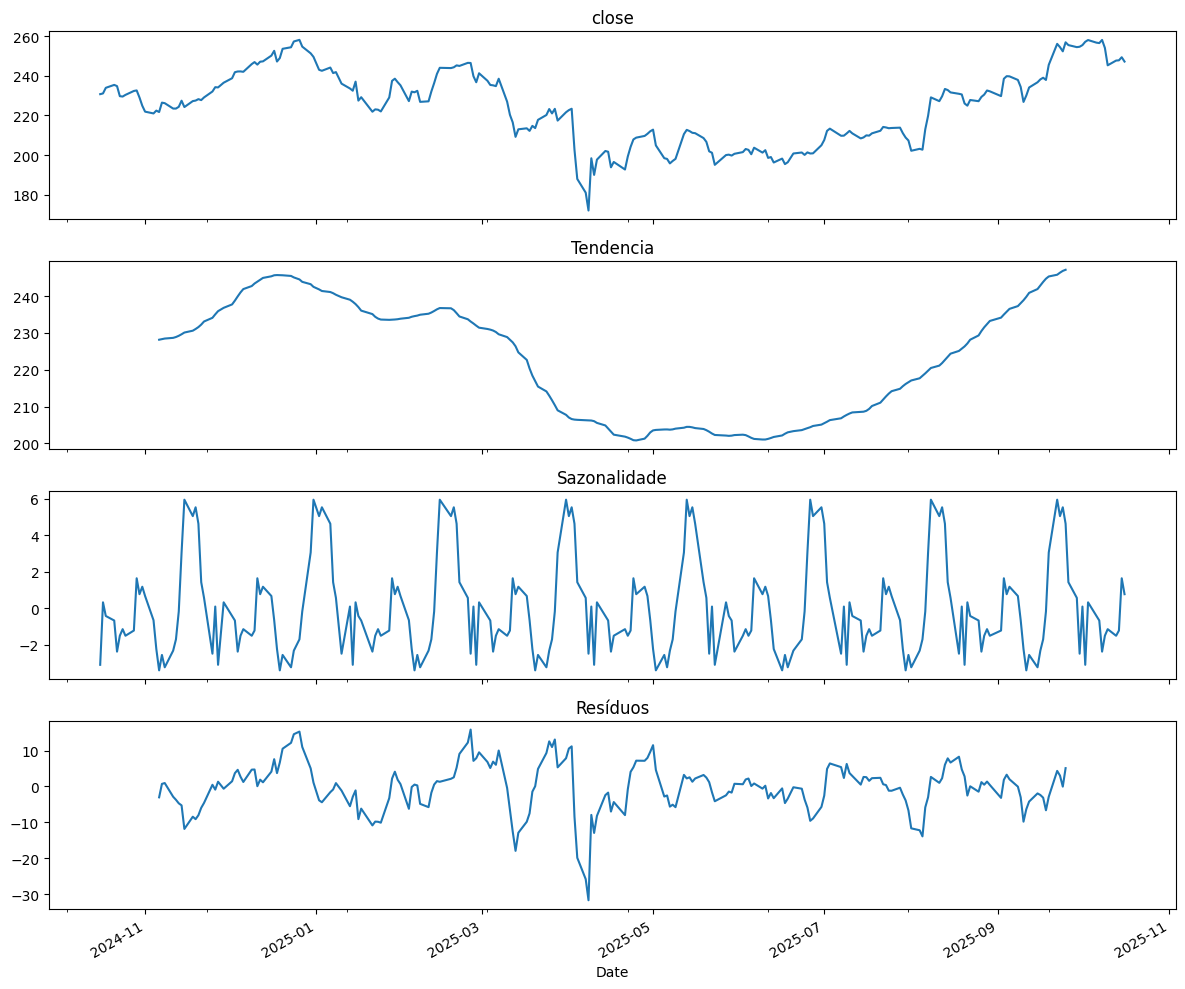

In [ ]:

# Plots separados para cada componente da decomposição
plt.figure(figsize=(12,3))
decomp.observed.plot(title='Observed (close)')
plt.xlabel('Date'); plt.ylabel('Close')
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
decomp.trend.plot(title='Tendência')
plt.xlabel('Date'); plt.ylabel('Trend')
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
decomp.seasonal.plot(title='Sazonalidade')
plt.xlabel('Date'); plt.ylabel('Seasonal')
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3))
decomp.resid.plot(title='Resíduos')
plt.xlabel('Date'); plt.ylabel('Residuals')
plt.tight_layout(); plt.show()